In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Interpretability libraries
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text
import lime
import lime.lime_tabular



# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
## Loading the dataset into pandas dataframe
df=pd.read_csv('diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
18507,Female,65.0,1,1,never,33.55,8.2,140.0,1
18508,Male,55.0,0,1,former,30.42,6.2,300.0,1
18509,Female,61.0,0,0,No Info,34.45,6.5,280.0,1
18510,Female,58.0,1,0,never,38.31,7.0,200.0,1


# Exploratory Data Analysis

Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               18512 non-null  object 
 1   age                  18511 non-null  float64
 2   hypertension         18512 non-null  int64  
 3   heart_disease        18512 non-null  int64  
 4   smoking_history      18509 non-null  object 
 5   bmi                  18506 non-null  float64
 6   HbA1c_level          18509 non-null  float64
 7   blood_glucose_level  18511 non-null  float64
 8   diabetes             18512 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()


gender                 0
age                    1
hypertension           0
heart_disease          0
smoking_history        3
bmi                    6
HbA1c_level            3
blood_glucose_level    1
diabetes               0
dtype: int64

In [5]:

df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18511.000000,18512.000000,18512.000000,18506.000000,18509.000000,18511.000000,18512.000000
mean,49.757100,0.146662,0.084162,29.240411,6.105262,160.801361,0.459162
std,21.749891,0.353778,0.277638,7.352926,1.275292,56.253353,0.498343
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,35.000000,0.000000,0.000000,25.650000,5.700000,130.000000,0.000000
50%,53.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,67.000000,0.000000,0.000000,32.500000,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [6]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,gender,smoking_history
count,18512,18509
unique,3,6
top,Female,never
freq,10452,6922


In [7]:


# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140.0,0,False,False,False,False,True,False,True,False,False
1,54.0,0,0,27.32,6.6,80.0,0,True,False,False,False,False,False,True,False,False
2,28.0,0,0,27.32,5.7,158.0,0,False,False,False,False,True,False,False,True,False
3,36.0,0,0,23.45,5.0,155.0,0,False,True,False,False,False,False,True,False,False
4,76.0,1,1,20.14,4.8,155.0,0,False,True,False,False,False,False,False,True,False


In [8]:
## dropping null values
df=df.dropna(how='any')

In [9]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

In [10]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
age,1.000000,0.251257,0.251830,0.270907,0.283605,0.263716,0.473956,-0.272258,-0.009245,0.054234,0.216033,0.055576,0.052744,-0.007241,0.007794,-0.021518
hypertension,0.251257,1.000000,0.103342,0.163283,0.158840,0.140179,0.257961,-0.133286,0.008433,0.019080,0.080456,0.051108,0.004963,-0.017325,0.017461,-0.005280
heart_disease,0.251830,0.103342,1.000000,0.053989,0.133491,0.118920,0.215292,-0.062144,0.007660,0.056178,0.107737,-0.047089,0.000744,-0.095235,0.095339,-0.003859
bmi,0.270907,0.163283,0.053989,1.000000,0.200120,0.189520,0.344554,-0.209806,0.036246,0.030541,0.101400,0.073070,0.027327,0.023699,-0.023259,-0.017159
HbA1c_level,0.283605,0.158840,0.133491,0.200120,1.000000,0.324099,0.599361,-0.138819,0.028233,0.024712,0.087613,0.025320,0.025695,-0.048835,0.048967,-0.005039
blood_glucose_level,0.263716,0.140179,0.118920,0.189520,0.324099,1.000000,0.545486,-0.115993,0.031859,0.009938,0.080349,0.015211,0.022267,-0.038881,0.038930,-0.001840
diabetes,0.473956,0.257961,0.215292,0.344554,0.599361,0.545486,1.000000,-0.217870,0.033112,0.042167,0.152162,0.037678,0.035476,-0.073881,0.074185,-0.011729
smoking_history_No Info,-0.272258,-0.133286,-0.062144,-0.209806,-0.138819,-0.115993,-0.217870,1.000000,-0.206674,-0.135863,-0.240483,-0.478286,-0.171503,-0.027458,0.027417,0.001608
smoking_history_current,-0.009245,0.008433,0.007660,0.036246,0.028233,0.031859,0.033112,-0.206674,1.000000,-0.073345,-0.129823,-0.258201,-0.092585,-0.030980,0.031091,-0.004254
smoking_history_ever,0.054234,0.019080,0.056178,0.030541,0.024712,0.009938,0.042167,-0.135863,-0.073345,1.000000,-0.085343,-0.169735,-0.060863,-0.030415,0.030488,-0.002796


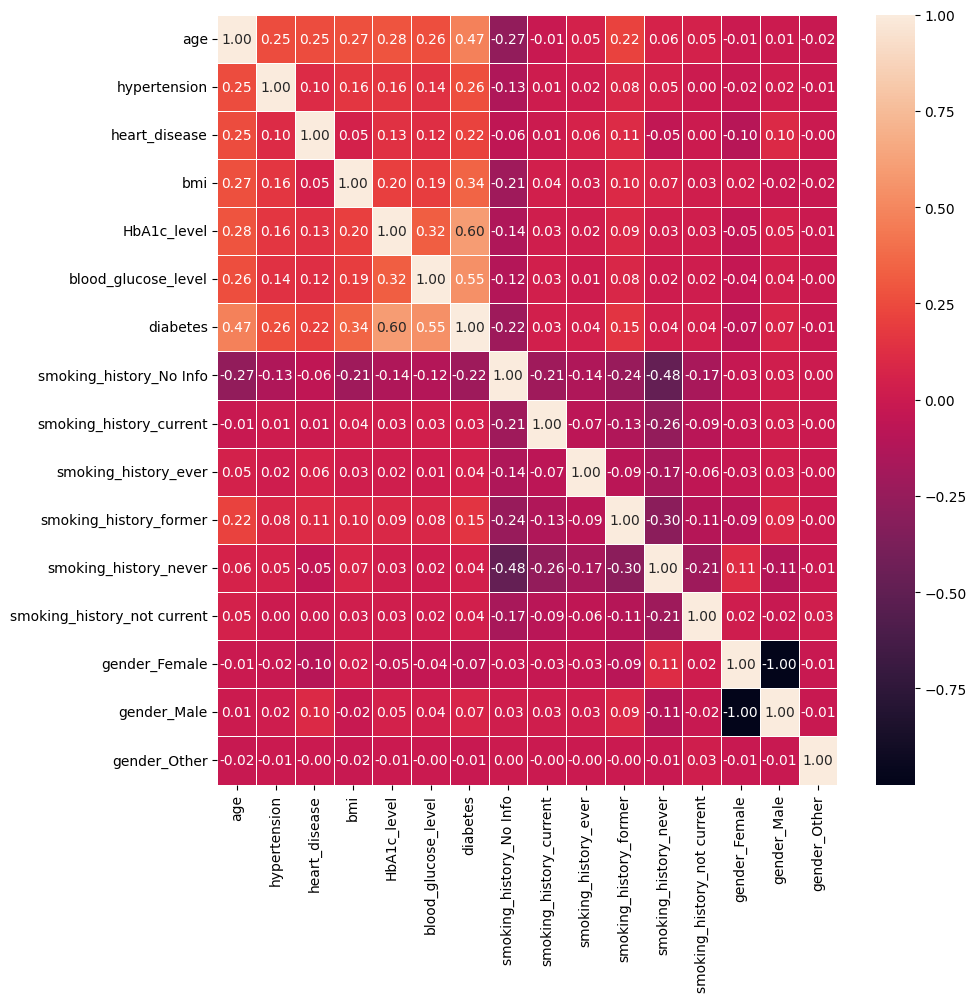

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering



In [12]:


X_encoded = pd.get_dummies(df.drop('diabetes', axis=1))
y = df['diabetes']

# Splitting data to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# ANOVA F-test - Select top 10 features
f_selector = SelectKBest(f_classif, k=10)
X_train_selected = f_selector.fit_transform(X_train, y_train)
X_test_selected = f_selector.transform(X_test)

# Get selected features
selected_mask = f_selector.get_support()
selected_features = X_encoded.columns[selected_mask]
best_10_features = selected_features.tolist()

# Create feature scores dataframe sorted by f_score (descending)
feature_scores = pd.DataFrame({
    'feature': X_encoded.columns,
    'f_score': f_selector.scores_,
    'p_value': f_selector.pvalues_
}).sort_values('f_score', ascending=False)

# Get top 10 features with ranking
top_10_scores = feature_scores.head(10).reset_index(drop=True)

print("="*70)
print("TOP 10 FEATURES SELECTED BY ANOVA F-TEST (RANKED BY F-SCORE)")
print("="*70)
for i, row in top_10_scores.iterrows():
    print(f"{i+1:2d}. {row['feature']:<30} | F-Score: {row['f_score']:>10.4f} | P-Value: {row['p_value']:.2e}")


TOP 10 FEATURES SELECTED BY ANOVA F-TEST (RANKED BY F-SCORE)
 1. HbA1c_level                    | F-Score:  8434.4261 | P-Value: 0.00e+00
 2. blood_glucose_level            | F-Score:  6256.6025 | P-Value: 0.00e+00
 3. age                            | F-Score:  4317.0542 | P-Value: 0.00e+00
 4. bmi                            | F-Score:  1955.2045 | P-Value: 0.00e+00
 5. hypertension                   | F-Score:  1071.0668 | P-Value: 7.15e-227
 6. smoking_history_No Info        | F-Score:   743.0967 | P-Value: 1.09e-159
 7. heart_disease                  | F-Score:   726.2017 | P-Value: 3.43e-156
 8. smoking_history_former         | F-Score:   346.1306 | P-Value: 2.19e-76
 9. gender_Male                    | F-Score:    92.0299 | P-Value: 9.88e-22
10. gender_Female                  | F-Score:    91.4321 | P-Value: 1.33e-21


In [13]:
# Prepare data using the best 10 selected features
print("\n" + "="*70)
print("PREPARING DATA S FOR MODEL TRAINING")
print("="*70)

# Get indices of best 10 features in original feature set
best_10_feature_indices = [list(X_encoded.columns).index(f) for f in best_10_features]

# Create new X_train and X_test with only best 10 features
X_train_best = X_train.iloc[:, best_10_feature_indices]
X_test_best = X_test.iloc[:, best_10_feature_indices]

print(f"\n✓ Original feature count: {X_train.shape[1]}")
print(f"✓ Selected feature count: {X_train_best.shape[1]}")
print(f"✓ Training set shape: {X_train_best.shape}")
print(f"✓ Test set shape: {X_test_best.shape}")

# Apply SMOTE on the best 10 features
from imblearn.over_sampling import SMOTE

print("\n" + "-"*70)
print("Applying SMOTE...")
print("-"*70)

smote = SMOTE(random_state=42)
X_train_best_balanced, y_train_balanced = smote.fit_resample(X_train_best, y_train)

print(f"✓ Original training samples: {len(X_train_best)}")
print(f"✓ Balanced training samples: {len(X_train_best_balanced)}")
print(f"✓ Synthetic samples created: {len(X_train_best_balanced) - len(X_train_best)}")

# Standardize features for models that need it (LR, SVM)
print("\n" + "-"*70)
print("Standardizing Features...")
print("-"*70)

scaler_best = StandardScaler()
X_train_best_scaled = scaler_best.fit_transform(X_train_best_balanced)
X_test_best_scaled = scaler_best.transform(X_test_best)

print(f"✓ Scaler fitted on balanced training data")
print(f"✓ Ready for model training with best 10 features!")

# Store variables for use in next cells
print("\n" + "="*70)
print("VARIABLES READY FOR MODEL TRAINING:")
print("="*70)
print(f"  - X_train_best_balanced: Raw best 10 features (balanced)")
print(f"  - X_train_best_scaled: Standardized best 10 features (balanced)")
print(f"  - X_test_best_scaled: Standardized best 10 features (test)")
print(f"  - X_test_best: Raw best 10 features (test)")
print(f"  - y_train_balanced: Balanced target variable")
print(f"  - y_test: Original test target variable")
print("="*70)


PREPARING DATA S FOR MODEL TRAINING

✓ Original feature count: 15
✓ Selected feature count: 10
✓ Training set shape: (14800, 10)
✓ Test set shape: (3701, 10)

----------------------------------------------------------------------
Applying SMOTE...
----------------------------------------------------------------------
✓ Original training samples: 14800
✓ Balanced training samples: 16016
✓ Synthetic samples created: 1216

----------------------------------------------------------------------
Standardizing Features...
----------------------------------------------------------------------
✓ Scaler fitted on balanced training data
✓ Ready for model training with best 10 features!

VARIABLES READY FOR MODEL TRAINING:
  - X_train_best_balanced: Raw best 10 features (balanced)
  - X_train_best_scaled: Standardized best 10 features (balanced)
  - X_test_best_scaled: Standardized best 10 features (test)
  - X_test_best: Raw best 10 features (test)
  - y_train_balanced: Balanced target variable



SMOTE BALANCING WITH BEST 10 FEATURES

Class distribution BEFORE SMOTE (Best 10 Features):
Counter({0: 8008, 1: 6792})

Applying SMOTE...
Input shape - X_train_best: (14800, 10)
Input shape - y_train: (14800,)
Output shape - X_train_best_balanced: (16016, 10)
Output shape - y_train_balanced: (16016,)

Class distribution AFTER SMOTE (Best 10 Features):
Counter({1: 8008, 0: 8008})


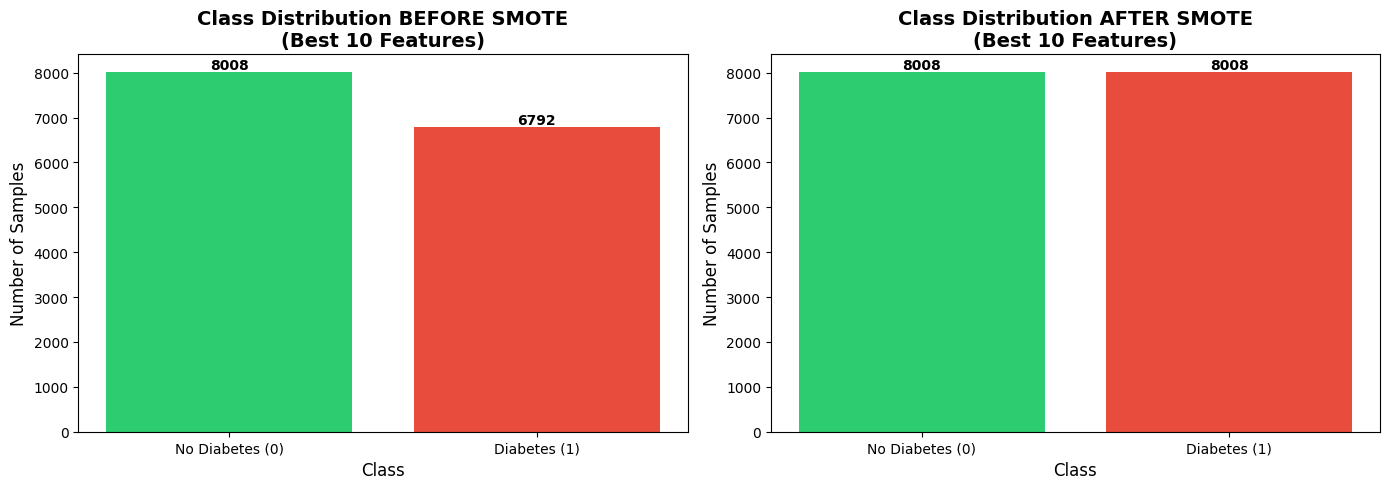

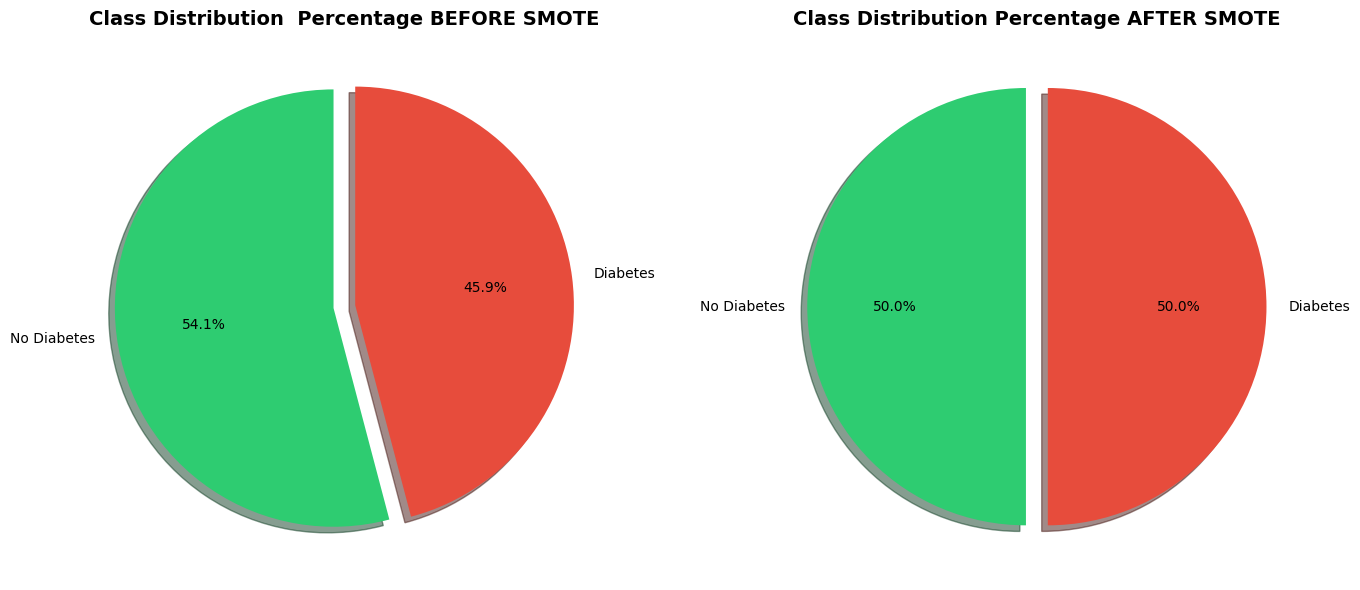


BALANCING STATISTICS
Original training set size: 14800
Balanced training set size: 16016
Synthetic samples created: 1216

Number of features used: 10
Feature names: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No Info', 'smoking_history_former', 'gender_Female', 'gender_Male']

Class balance ratio BEFORE: 0.848
Class balance ratio AFTER: 1.000


In [14]:


print("\n" + "="*70)
print("SMOTE BALANCING WITH BEST 10 FEATURES")
print("="*70)

# Visualize class distribution BEFORE SMOTE (using best 10 features)
print("\nClass distribution BEFORE SMOTE (Best 10 Features):")
print(Counter(y_train))

# Create figure with subplots for before and after comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Before SMOTE
axes[0].bar(['No Diabetes (0)', 'Diabetes (1)'], 
            [list(y_train).count(0), list(y_train).count(1)],
            color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution BEFORE SMOTE\n(Best 10 Features)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_xlabel('Class', fontsize=12)
for i, v in enumerate([list(y_train).count(0), list(y_train).count(1)]):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Apply SMOTE on best 10 features (data already prepared)
print("\nApplying SMOTE...")
print(f"Input shape - X_train_best: {X_train_best.shape}")
print(f"Input shape - y_train: {y_train.shape}")

# Note: SMOTE was already applied in the previous cell to X_train_best
# X_train_best_balanced and y_train_balanced are already available
print(f"Output shape - X_train_best_balanced: {X_train_best_balanced.shape}")
print(f"Output shape - y_train_balanced: {y_train_balanced.shape}")

# Visualize class distribution AFTER SMOTE
print("\nClass distribution AFTER SMOTE (Best 10 Features):")
print(Counter(y_train_balanced))

# Plot 2: After SMOTE
axes[1].bar(['No Diabetes (0)', 'Diabetes (1)'], 
            [list(y_train_balanced).count(0), list(y_train_balanced).count(1)],
            color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Class Distribution AFTER SMOTE\n(Best 10 Features)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_xlabel('Class', fontsize=12)
for i, v in enumerate([list(y_train_balanced).count(0), list(y_train_balanced).count(1)]):
    axes[1].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional visualization: Pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart BEFORE SMOTE
before_counts = [list(y_train).count(0), list(y_train).count(1)]
axes[0].pie(before_counts, labels=['No Diabetes', 'Diabetes'], 
            autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'],
            explode=(0.05, 0.05), shadow=True)
axes[0].set_title('Class Distribution  Percentage BEFORE SMOTE', 
                  fontsize=14, fontweight='bold')

# Pie chart AFTER SMOTE
after_counts = [list(y_train_balanced).count(0), list(y_train_balanced).count(1)]
axes[1].pie(after_counts, labels=['No Diabetes', 'Diabetes'], 
            autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'],
            explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Class Distribution Percentage AFTER SMOTE', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*70)
print("BALANCING STATISTICS")
print("="*70)
print(f"Original training set size: {len(y_train)}")
print(f"Balanced training set size: {len(y_train_balanced)}")
print(f"Synthetic samples created: {len(y_train_balanced) - len(y_train)}")
print(f"\nNumber of features used: {X_train_best_balanced.shape[1]}")
print(f"Feature names: {best_10_features}")
print(f"\nClass balance ratio BEFORE: {list(y_train).count(1) / list(y_train).count(0):.3f}")
print(f"Class balance ratio AFTER: {list(y_train_balanced).count(1) / list(y_train_balanced).count(0):.3f}")
print("="*70)

# Model development and training

In [15]:
# Initializing models for training with BEST 10 FEATURES
print("\n" + "="*70)
print("TRAINING MODELS")
print("="*70)

models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf')
}

# Training individual models and store results
individual_models = {}
individual_predictions = {}
individual_probabilities = {}

print("\nTraining individual models...")
print("-"*70)

for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Using scaled data for LR and SVM, and raw data for RF (all with best 10 features)
    if name in ['Logistic Regression', 'SVM']:
        # Train on scaled balanced data
        model.fit(X_train_best_scaled, y_train_balanced)
        train_pred = model.predict(X_train_best_scaled)
        # Test on scaled test data
        test_pred = model.predict(X_test_best_scaled)
        test_proba = model.predict_proba(X_test_best_scaled)[:, 1]
    else:  # Random Forest
        # Train on raw balanced data (RF doesn't need scaling)
        model.fit(X_train_best_balanced, y_train_balanced)
        train_pred = model.predict(X_train_best_balanced)
        # Test on raw test data
        test_pred = model.predict(X_test_best)
        test_proba = model.predict_proba(X_test_best)[:, 1]
    
    # Store model and predictions
    individual_models[name] = model
    individual_predictions[name] = test_pred
    individual_probabilities[name] = test_proba
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train_balanced, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, zero_division=0)
    test_recall = recall_score(y_test, test_pred, zero_division=0)
    test_f1 = f1_score(y_test, test_pred, zero_division=0)
    test_auc = roc_auc_score(y_test, test_proba)
    
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy:  {test_accuracy:.4f}")
    print(f"  Test Precision: {test_precision:.4f}")
    print(f"  Test Recall:    {test_recall:.4f}")
    print(f"  Test F1-Score:  {test_f1:.4f}")
    print(f"  Test AUC-ROC:   {test_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"  Confusion Matrix:\n{cm}")

print("\n" + "="*70)
print("✓ Individual model training completed successfully!")
print("="*70)


TRAINING MODELS

Training individual models...
----------------------------------------------------------------------

 Training Random Forest...
  Train Accuracy: 0.8986
  Test Accuracy:  0.8917
  Test Precision: 0.8957
  Test Recall:    0.8646
  Test F1-Score:  0.8799
  Test AUC-ROC:   0.9661
  Confusion Matrix:
[[1831  171]
 [ 230 1469]]

 Training Logistic Regression...
  Train Accuracy: 0.8879
  Test Accuracy:  0.8825
  Test Precision: 0.8696
  Test Recall:    0.8752
  Test F1-Score:  0.8724
  Test AUC-ROC:   0.9592
  Confusion Matrix:
[[1779  223]
 [ 212 1487]]

 Training SVM...
  Train Accuracy: 0.8990
  Test Accuracy:  0.8925
  Test Precision: 0.8732
  Test Recall:    0.8958
  Test F1-Score:  0.8844
  Test AUC-ROC:   0.9570
  Confusion Matrix:
[[1781  221]
 [ 177 1522]]

✓ Individual model training completed successfully!


In [16]:


# Create a dictionary to hold the classification report data
report_data = {}

# Generate classification reports and store them in the dictionary
for name in individual_models.keys():
    report = classification_report(y_test, individual_predictions[name], output_dict=True)
    report_data[name] = {
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Support': report['weighted avg']['support'],
    }

# Create a DataFrame from the report data
report_df = pd.DataFrame(report_data).T

# Display the DataFrame as a table
print("\nClassification Report as Table:")
print("=" * 50)
print(report_df)


Classification Report as Table:
                     Precision    Recall  F1-Score  Support
Random Forest         0.891768  0.891651  0.891480   3701.0
Logistic Regression   0.882535  0.882464  0.882492   3701.0
SVM                   0.892894  0.892461  0.892551   3701.0


In [17]:
# Create Voting Classifier ensemble
ensemble = VotingClassifier(
    estimators=[
        ('rf', individual_models['Random Forest']),
        ('lr', individual_models['Logistic Regression']),
        ('svm', individual_models['SVM'])
    ],
    voting='soft'  # Using probability predictions
)

# Fit the ensemble model
print("Training ensemble model...")
ensemble.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble.predict(X_test)
ensemble_proba = ensemble.predict_proba(X_test)[:, 1]

# Calculate metrics for ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_proba)

print("\nEnsemble Model Performance:")
print("="*50)
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-Score: {ensemble_f1:.4f}")
print(f"AUC-ROC: {ensemble_auc:.4f}")

# Compare with individual models
print("\nModel Comparison:")
print("="*50)
print("Model\t\t\tAccuracy\tF1-Score")
print("-"*50)
for name in individual_models.keys():
    acc = accuracy_score(y_test, individual_predictions[name])
    f1 = f1_score(y_test, individual_predictions[name])
    print(f"{name:<20} {acc:.4f}\t\t{f1:.4f}")
print(f"Ensemble\t\t{ensemble_accuracy:.4f}\t\t{ensemble_f1:.4f}")


# Create Voting Classifier ensemble
# Note: We need to use a custom approach since different models use different data formats
from sklearn.ensemble import VotingClassifier

# Create new instances of models for ensemble (to avoid conflicts)
rf_ensemble = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3)
lr_ensemble = LogisticRegression(random_state=42, max_iter=1000)
svm_ensemble = SVC(random_state=42, probability=True, kernel='rbf')

# Train models individually on their respective data formats
print("Training ensemble model components...")
rf_ensemble.fit(X_train_best_balanced, y_train_balanced)
lr_ensemble.fit(X_train_best_scaled, y_train_balanced)
svm_ensemble.fit(X_train_best_scaled, y_train_balanced)

# Make predictions from each model
rf_pred = rf_ensemble.predict(X_test_best)
rf_proba = rf_ensemble.predict_proba(X_test_best)

lr_pred = lr_ensemble.predict(X_test_best_scaled)
lr_proba = lr_ensemble.predict_proba(X_test_best_scaled)

svm_pred = svm_ensemble.predict(X_test_best_scaled)
svm_proba = svm_ensemble.predict_proba(X_test_best_scaled)

# Combine predictions using soft voting (averaging probabilities)
ensemble_proba = (rf_proba + lr_proba + svm_proba) / 3
ensemble_pred = (ensemble_proba[:, 1] >= 0.5).astype(int)
ensemble_proba_positive = ensemble_proba[:, 1]

# Calculate metrics for ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_proba_positive)

print("\nEnsemble Model Performance:")
print("="*50)
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-Score: {ensemble_f1:.4f}")
print(f"AUC-ROC: {ensemble_auc:.4f}")

# Confusion Matrix for Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
print(f"\nConfusion Matrix:\n{cm_ensemble}")

# Compare with individual models
print("\n\nModel Comparison:")
print("="*70)
print(f"{'Model':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-"*70)

for name in individual_models.keys():
    acc = accuracy_score(y_test, individual_predictions[name])
    prec = precision_score(y_test, individual_predictions[name])
    rec = recall_score(y_test, individual_predictions[name])
    f1 = f1_score(y_test, individual_predictions[name])
    print(f"{name:<25} {acc:<12.4f} {prec:<12.4f} {rec:<12.4f} {f1:<12.4f}")

print(f"{'Ensemble':<25} {ensemble_accuracy:<12.4f} {ensemble_precision:<12.4f} {ensemble_recall:<12.4f} {ensemble_f1:<12.4f}")
print("="*70)

# Determine if ensemble is the best
all_f1_scores = {name: f1_score(y_test, individual_predictions[name]) for name in individual_models.keys()}
all_f1_scores['Ensemble'] = ensemble_f1
best_model_overall = max(all_f1_scores, key=all_f1_scores.get)

print(f"\nBest Overall Model: {best_model_overall} (F1-Score: {all_f1_scores[best_model_overall]:.4f})")



Training ensemble model...

Ensemble Model Performance:
Accuracy: 0.8938
Precision: 0.8924
Recall: 0.8740
F1-Score: 0.8831
AUC-ROC: 0.9618

Model Comparison:
Model			Accuracy	F1-Score
--------------------------------------------------
Random Forest        0.8917		0.8799
Logistic Regression  0.8825		0.8724
SVM                  0.8925		0.8844
Ensemble		0.8938		0.8831
Training ensemble model components...

Ensemble Model Performance:
Accuracy: 0.8935
Precision: 0.8791
Recall: 0.8905
F1-Score: 0.8848
AUC-ROC: 0.9651

Confusion Matrix:
[[1794  208]
 [ 186 1513]]


Model Comparison:
Model                     Accuracy     Precision    Recall       F1-Score    
----------------------------------------------------------------------
Random Forest             0.8917       0.8957       0.8646       0.8799      
Logistic Regression       0.8825       0.8696       0.8752       0.8724      
SVM                       0.8925       0.8732       0.8958       0.8844      
Ensemble                  0.8935 



Detailed Model Comparison:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC  \
Random Forest          0.8917     0.8957  0.8646    0.8799   0.9661   
Logistic Regression    0.8825     0.8696  0.8752    0.8724   0.9592   
SVM                    0.8925     0.8732  0.8958    0.8844   0.9570   
Ensemble               0.8935     0.8791  0.8905    0.8848   0.9651   

                     Average Score  
Random Forest               0.8996  
Logistic Regression         0.8918  
SVM                         0.9006  
Ensemble                    0.9026  


Best Model for Each Metric:
Accuracy       : Ensemble                  (Score: 0.8935)
Precision      : Random Forest             (Score: 0.8957)
Recall         : SVM                       (Score: 0.8958)
F1-Score       : Ensemble                  (Score: 0.8848)
AUC-ROC        : Random Forest             (Score: 0.9661)


 Overall Best Model:
Model: Ensemble
Average Score: 0.9026

Detailed Scores:
  Accuracy: 0.8935
  Preci

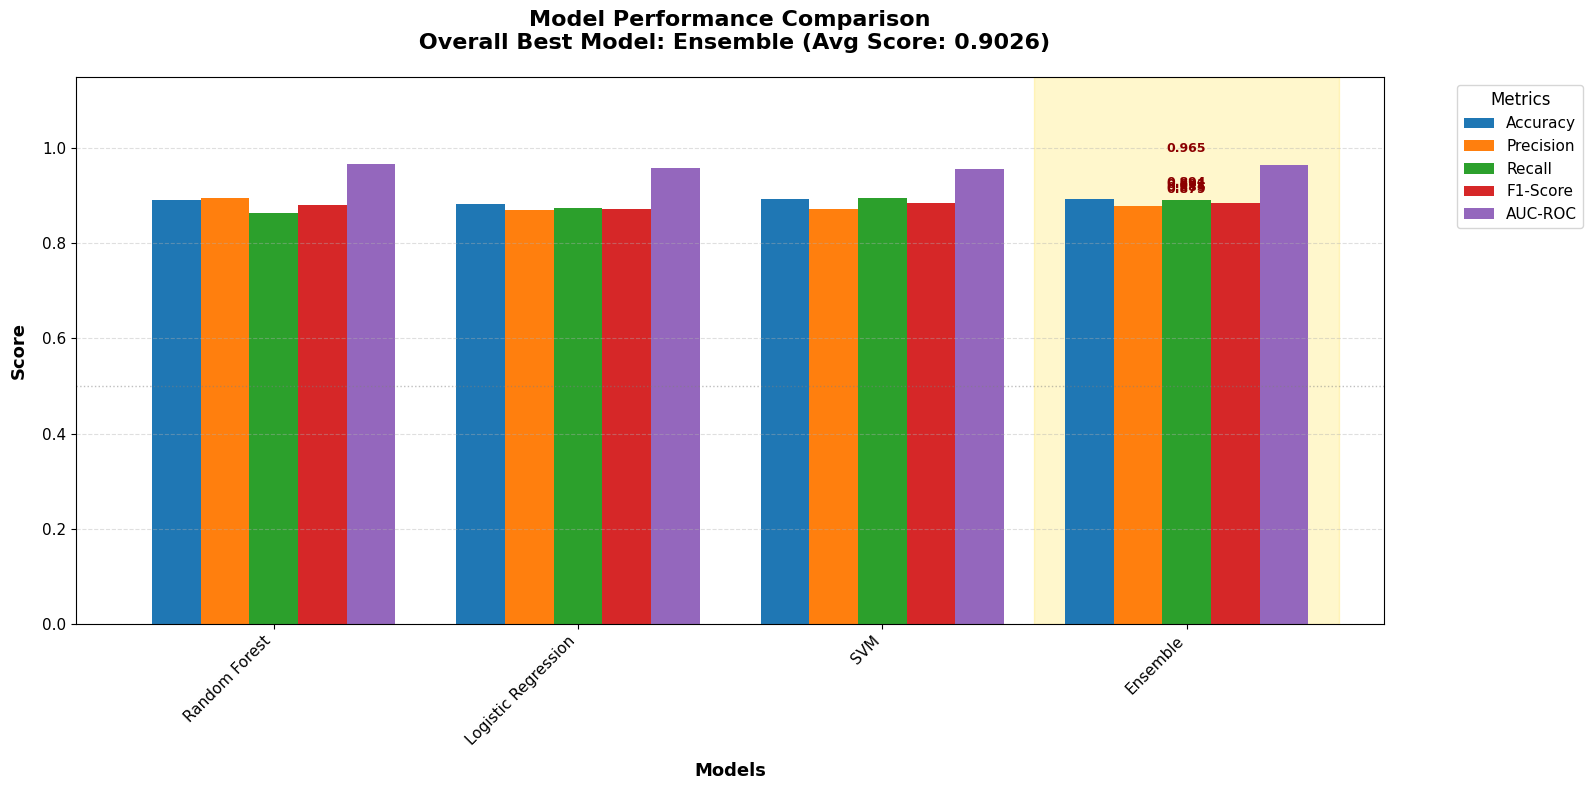

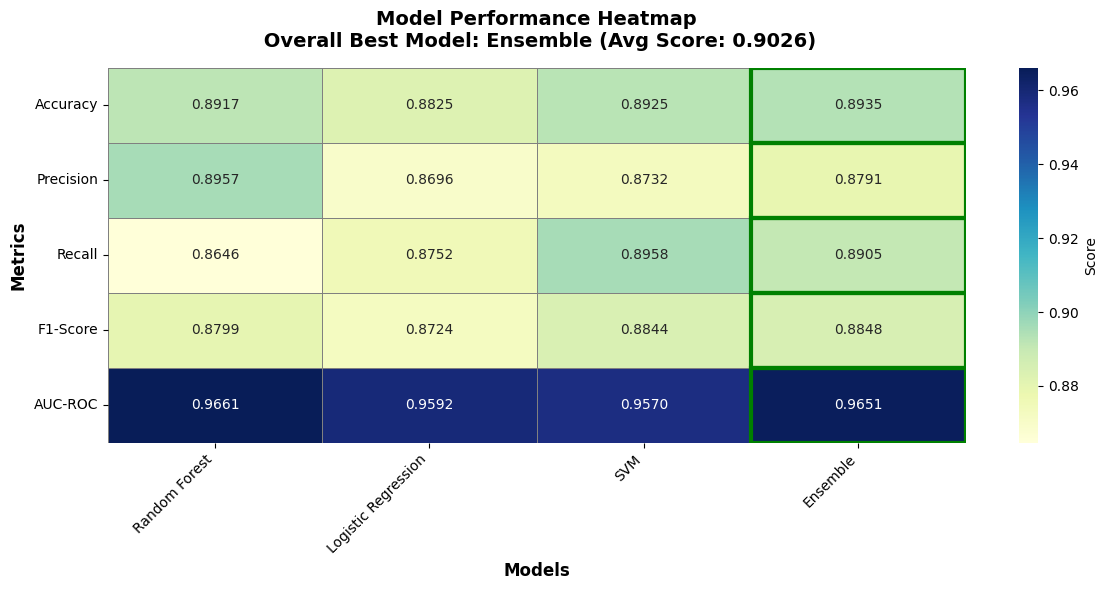


 Model comparison results saved to: model_comparison_results.csv


In [18]:


# Create a comparison DataFrame including the ensemble
comparison_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC-ROC': []
}

# Get metrics for all individual models using already calculated predictions
for name in individual_models.keys():
    pred = individual_predictions[name]
    proba = individual_probabilities[name]
    
    comparison_metrics['Accuracy'].append(accuracy_score(y_test, pred))
    comparison_metrics['Precision'].append(precision_score(y_test, pred, zero_division=0))
    comparison_metrics['Recall'].append(recall_score(y_test, pred, zero_division=0))
    comparison_metrics['F1-Score'].append(f1_score(y_test, pred, zero_division=0))
    comparison_metrics['AUC-ROC'].append(roc_auc_score(y_test, proba))

# Add ensemble metrics (already calculated)
comparison_metrics['Accuracy'].append(ensemble_accuracy)
comparison_metrics['Precision'].append(ensemble_precision)
comparison_metrics['Recall'].append(ensemble_recall)
comparison_metrics['F1-Score'].append(ensemble_f1)
comparison_metrics['AUC-ROC'].append(ensemble_auc)

# Create DataFrame
model_names = list(individual_models.keys()) + ['Ensemble']
comparison_df = pd.DataFrame(comparison_metrics, index=model_names)

# Find the best model for each metric
best_model_metrics = comparison_df.idxmax()

# Calculate average performance across all metrics
comparison_df['Average Score'] = comparison_df.mean(axis=1)
overall_best_model = comparison_df['Average Score'].idxmax()

# Print results
print("\n\nDetailed Model Comparison:")
print("=" * 80)
print(comparison_df.round(4))

print("\n\nBest Model for Each Metric:")
print("=" * 80)
for metric, model in best_model_metrics.items():
    if metric != 'Average Score':
        print(f"{metric:<15}: {model:<25} (Score: {comparison_df.loc[model, metric]:.4f})")

print("\n\n Overall Best Model:")
print("=" * 80)
print(f"Model: {overall_best_model}")
print(f"Average Score: {comparison_df.loc[overall_best_model, 'Average Score']:.4f}")
print("\nDetailed Scores:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    print(f"  {metric}: {comparison_df.loc[overall_best_model, metric]:.4f}")
print("=" * 80)

# Visualization - Bar Chart
fig, ax = plt.subplots(figsize=(16, 8))
comparison_df.drop('Average Score', axis=1).plot(kind='bar', width=0.8, ax=ax)

# Enhanced visualization settings
best_avg_score = comparison_df.loc[overall_best_model, 'Average Score']
plt.title(f'Model Performance Comparison\n Overall Best Model: {overall_best_model} (Avg Score: {best_avg_score:.4f})', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontsize=13, labelpad=10, fontweight='bold')
plt.ylabel('Score', fontsize=13, labelpad=10, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, title='Metrics', title_fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Add horizontal line at 0.5 for reference
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, linewidth=1)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Highlight the best model with a different background color
best_model_idx = model_names.index(overall_best_model)
plt.axvspan(best_model_idx - 0.5, best_model_idx + 0.5, alpha=0.2, color='gold', zorder=0)

# Add value labels on bars for the best model
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']):
    value = comparison_df.loc[overall_best_model, metric]
    plt.text(best_model_idx, value + 0.02, f'{value:.3f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkred')

# Set y-axis limits
plt.ylim([0, 1.15])

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Create a heatmap for better visualization
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(comparison_df.drop('Average Score', axis=1).T, 
            annot=True, fmt='.4f', cmap='YlGnBu', 
            cbar_kws={'label': 'Score'}, 
            linewidths=0.5, linecolor='gray', ax=ax)
plt.title(f'Model Performance Heatmap\n Overall Best Model: {overall_best_model} (Avg Score: {best_avg_score:.4f})', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Metrics', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add  border around the best model column in heatmap
best_col_idx = model_names.index(overall_best_model)
for i in range(5):  # 5 metrics
    ax.add_patch(plt.Rectangle((best_col_idx, i), 1, 1, fill=False, edgecolor='green', lw=3))

plt.tight_layout()
plt.show()

# Save the comparison DataFrame to CSV for reference
comparison_df.to_csv('model_comparison_results.csv')
print("\n Model comparison results saved to: model_comparison_results.csv")


CONFUSION MATRIX AND EVALUATION FOR best_model
Model object: <class 'sklearn.ensemble._voting.VotingClassifier'>
Using test set: X_test with shape (3701, 15)


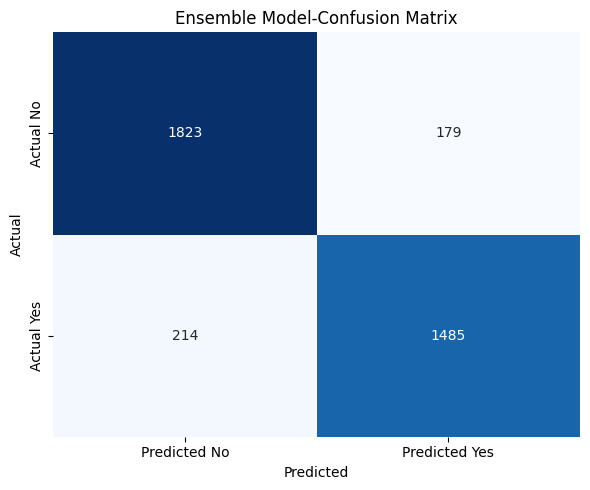


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2002
           1       0.89      0.87      0.88      1699

    accuracy                           0.89      3701
   macro avg       0.89      0.89      0.89      3701
weighted avg       0.89      0.89      0.89      3701

Summary metrics:
Accuracy: 0.8938
Precision: 0.8924
Recall: 0.8740
F1-score: 0.8831
AUC-ROC: 0.9618


In [19]:
best_model = ensemble


print('\n' + '='*60)
print('CONFUSION MATRIX AND EVALUATION FOR best_model')
print('='*60)

model = best_model
print(f'Model object: {type(model)}')

# Choose appropriate test set to match model input
candidate_test_sets = [
    ('X_test', globals().get('X_test', None)),
    ('X_test_best_scaled', globals().get('X_test_best_scaled', None)),
    ('X_test_best', globals().get('X_test_best', None)),
]
test_X = None
test_name = None
for name, Xcand in candidate_test_sets:
    if Xcand is None:
        continue
    try:
        # try predicting on a single row to validate compatibility
        _ = model.predict(Xcand[:1])
        test_X = Xcand
        test_name = name
        break
    except Exception as e:
        # incompatible shape or preprocessing required; try next
        continue

if test_X is None:
    raise RuntimeError('No compatible test set found for best_model. Please pass the correctly preprocessed test data.')

print(f'Using test set: {test_name} with shape {test_X.shape}')

y_pred = model.predict(test_X)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Ensemble Model-Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('Summary metrics:')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
try:
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(test_X)[:,1]
        print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
    else:
        print('Model has no predict_proba; AUC-ROC skipped.')
except Exception:
    print('AUC-ROC could not be computed for this model.')

In [20]:
import pickle
best_model = ensemble
model = best_model

# Save to a pickle file
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'ensemble_model.pkl'")

Model saved to 'ensemble_model.pkl'


In [21]:
import pickle

sample_data = sample_data = pd.DataFrame([{
    'age': 44,
        'hypertension': 0,
        'heart_disease': 0,
        'bmi': 19.31,
        'HbA1c_level': 6.5,
        'blood_glucose_level': 200,
        'smoking_history_No Info': 0,
        'smoking_history_current': 0,
        'smoking_history_ever': 0,
        'smoking_history_former': 0,
        'smoking_history_never': 1,
        'smoking_history_not current': 0,
        'gender_Female': 1,
        'gender_Male': 0,
        'gender_Other': 0
}])


# Loading the pickle file
with open('ensemble_model.pkl', 'rb') as file:
    model = pickle.load(file)
prediction = model.predict(sample_data)
prediction

array([0])

In [22]:
if prediction[0] == 1:
    print("The person is predicted to have DIABETES (Positive)")
else:
    print("The person is predicted to NOT have DIABETES (Negative)")

The person is predicted to NOT have DIABETES (Negative)



ENSEMBLE FEATURE IMPORTANCE

Ensemble Feature Importance Ranking:
--------------------------------------------------
HbA1c_level                   : 0.3319
blood_glucose_level           : 0.2126
age                           : 0.1504
smoking_history_former        : 0.0992
smoking_history_ever          : 0.0910
bmi                           : 0.0627
hypertension                  : 0.0226
heart_disease                 : 0.0130
smoking_history_No Info       : 0.0123
smoking_history_current       : 0.0045


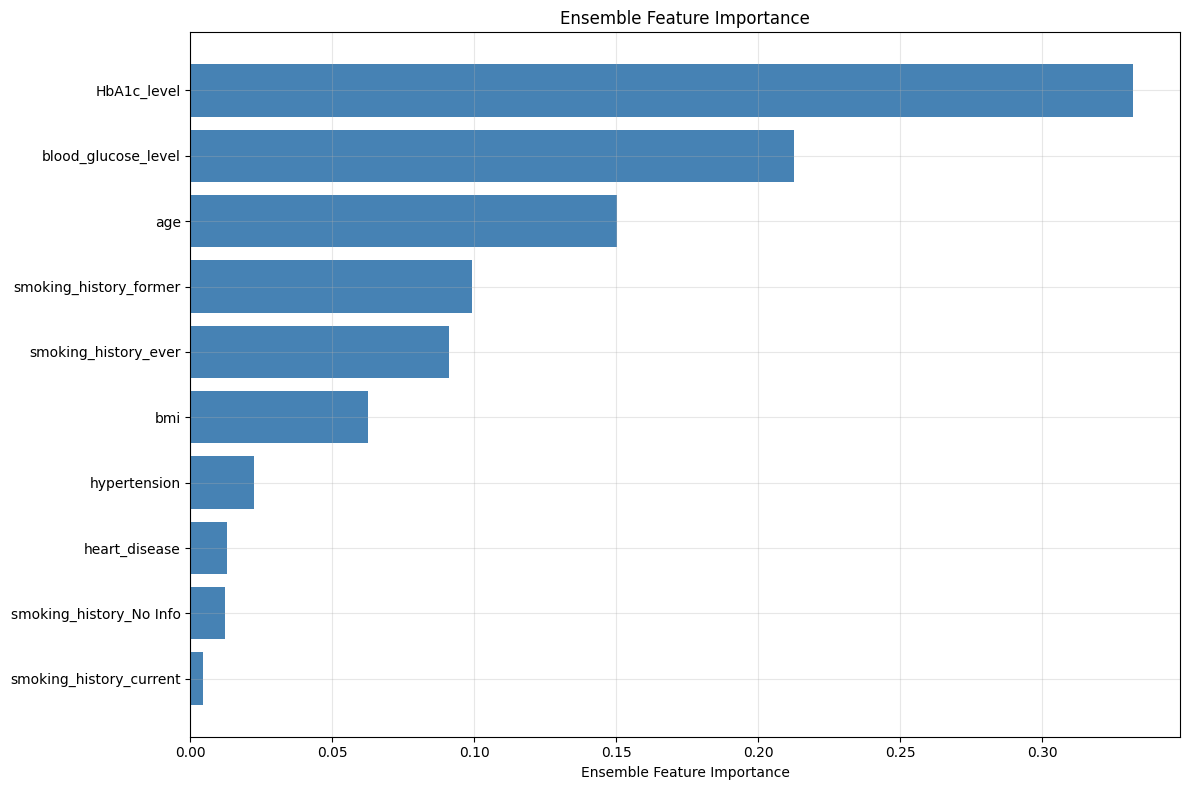


Top ensemble feature: HbA1c_level (importance: 0.3319)


In [23]:


print("\n" + "="*60)
print("ENSEMBLE FEATURE IMPORTANCE")
print("="*60)

# Get models from ensemble
rf_model = individual_models['Random Forest']
lr_model = individual_models['Logistic Regression']

# Use equal ensemble weighting
rf_weight, lr_weight = 0.5, 0.5

# Get common features
num_features_common = min(len(rf_model.feature_importances_), len(lr_model.coef_[0]))
feature_names = sample_data.columns[:num_features_common]

# Calculate ensemble feature importance
rf_importance = rf_model.feature_importances_[:num_features_common]
lr_importance = np.abs(lr_model.coef_[0][:num_features_common])
lr_importance = lr_importance / lr_importance.sum()

# Weighted ensemble importance
ensemble_importance = (rf_importance * rf_weight) + (lr_importance * lr_weight)
ensemble_importance = ensemble_importance / ensemble_importance.sum()

# Create ensemble importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': ensemble_importance
})

# Sort by ensemble importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Print ensemble feature importance ranking
print("\nEnsemble Feature Importance Ranking:")
print("-" * 50)
for idx, row in importance_df.iterrows():
    print(f"{row['feature']:<30}: {row['importance']:.4f}")

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'], importance_df['importance'], color='steelblue')
plt.xlabel('Ensemble Feature Importance')
plt.title('Ensemble Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save ensemble importance
ensemble_importance_dict = {
    'features': importance_df['feature'].tolist(),
    'importance': importance_df['importance'].tolist()
}

print(f"\nTop ensemble feature: {importance_df.iloc[0]['feature']} "
      f"(importance: {importance_df.iloc[0]['importance']:.4f})")


3. LIME EXPLANATION
Training data shape: (14800, 15)
Number of features: 15
Feature names: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current', 'gender_Female', 'gender_Male', 'gender_Other']
Instance shape: (15,)
LIME Explanation:
--------------------------------------------------


<Figure size 1000x600 with 0 Axes>

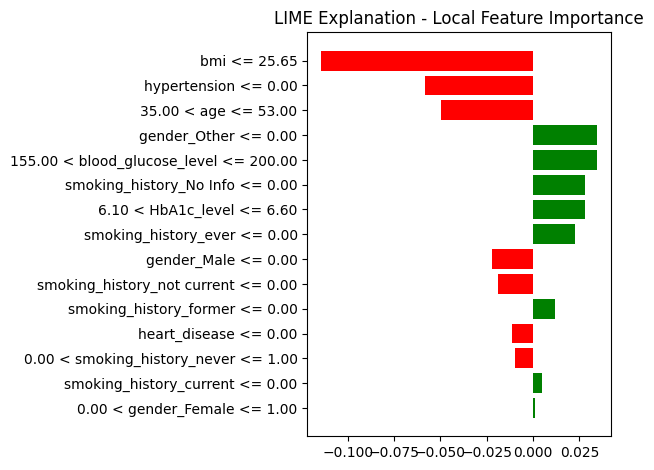


LIME Text Explanation:
------------------------------
bmi <= 25.65: -0.1143
hypertension <= 0.00: -0.0584
35.00 < age <= 53.00: -0.0495
gender_Other <= 0.00: 0.0347
155.00 < blood_glucose_level <= 200.00: 0.0343
smoking_history_No Info <= 0.00: 0.0280
6.10 < HbA1c_level <= 6.60: 0.0278
smoking_history_ever <= 0.00: 0.0224
gender_Male <= 0.00: -0.0223
smoking_history_not current <= 0.00: -0.0192
smoking_history_former <= 0.00: 0.0118
heart_disease <= 0.00: -0.0116
0.00 < smoking_history_never <= 1.00: -0.0097
smoking_history_current <= 0.00: 0.0048
0.00 < gender_Female <= 1.00: 0.0012

Prediction probabilities: [0.65425081 0.34574919]
Final prediction: No Diabetes


In [24]:


print("\n" + "="*60)
print("3. LIME EXPLANATION")
print("="*60)

# Ensure we have the correct feature names and data
if 'X_train' in locals():
    training_data = X_train.values
    feature_names_for_lime = X_train.columns.tolist()
else:
    training_data = sample_data.values
    feature_names_for_lime = sample_data.columns.tolist()

print(f"Training data shape: {training_data.shape}")
print(f"Number of features: {len(feature_names_for_lime)}")
print(f"Feature names: {feature_names_for_lime}")

# Create LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=training_data,
    feature_names=feature_names_for_lime,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification',
    verbose=False,  # Set to False to reduce output
    random_state=42
)

# Get the instance to explain
instance_to_explain = sample_data.iloc[0].values
print(f"Instance shape: {instance_to_explain.shape}")

# Explain the instance
exp = explainer_lime.explain_instance(
    instance_to_explain, 
    best_model.predict_proba, 
    num_features=len(feature_names_for_lime)  # Use all features
)

print("LIME Explanation:")
print("-" * 50)

# Show in notebook
exp.show_in_notebook(show_table=True)

# Plot explanation
plt.figure(figsize=(10, 6))
exp.as_pyplot_figure()
plt.title('LIME Explanation - Local Feature Importance')
plt.tight_layout()
plt.show()

# Print explanation in text format
print("\nLIME Text Explanation:")
print("-" * 30)
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

# Additional LIME information
print(f"\nPrediction probabilities: {best_model.predict_proba(sample_data)[0]}")
print(f"Final prediction: {'Diabetes' if best_model.predict(sample_data)[0] == 1 else 'No Diabetes'}")


2. SHAP EXPLANATION (KernelExplainer)


  0%|          | 0/1 [00:00<?, ?it/s]

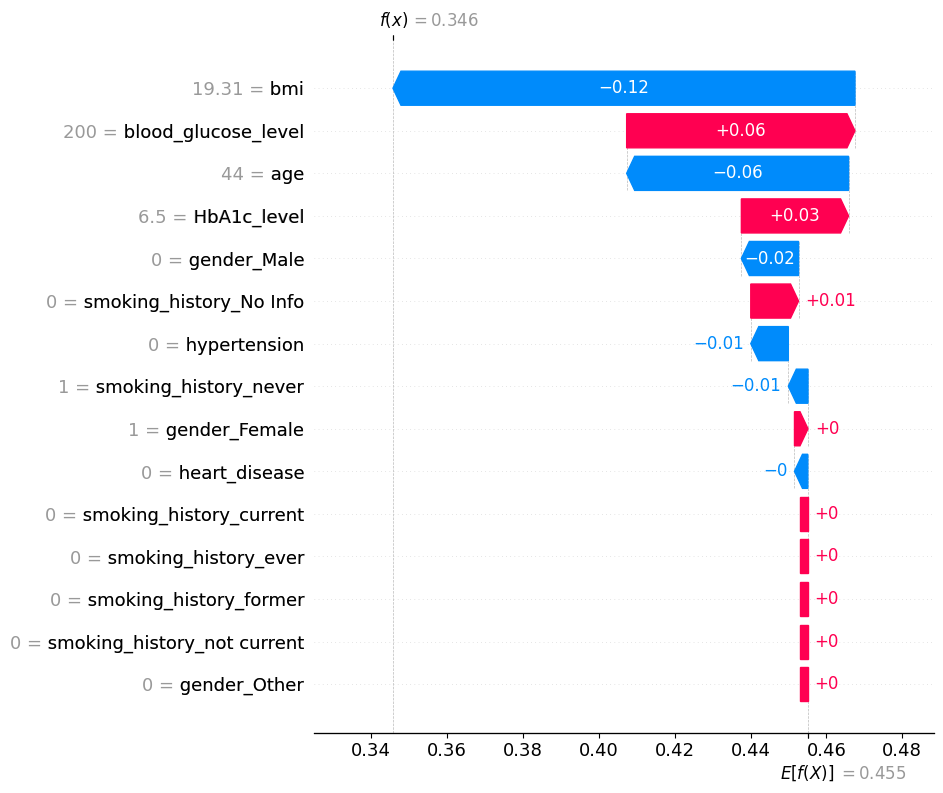

<Figure size 640x480 with 0 Axes>

In [25]:


print("\n" + "="*60)
print("2. SHAP EXPLANATION (KernelExplainer)")
print("="*60)

def voting_predict_proba(X):
    return best_model.predict_proba(X)

# Create background data
background_data = shap.sample(X_train, 100)

# Create KernelExplainer
explainer = shap.KernelExplainer(voting_predict_proba, background_data)

# Get SHAP values as Explanation object
shap_explanation = explainer(sample_data)

# For binary classification
if len(shap_explanation.shape) == 3:  # Multi-class format
    shap.plots.waterfall(shap_explanation[0, :, 1], max_display=20)
else:  # Single output format
    shap.plots.waterfall(shap_explanation[0], max_display=20)

plt.tight_layout()
plt.show()